# Example to connect to postgres

This is a tutorial to connect to our PostgreSQL database using python.

First you need to install the following libraries:
- psycopg2
- python-dotenv

Then you need to create a file with the name ".env". This file will contain the connection information and your credentials. This is an example:

```
DB_HOST=host_name
DB_NAME=postgres
DB_USER=my_user
DB_PASSWORD=my_password
DB_PORT=5432
```

After that you´re all set. We will import your credentials and connect to the database.

In [60]:
import os
import psycopg2 # PostgreSQL database adapter for Python
from dotenv import load_dotenv # Reads the key-value pair from .env file and adds them to environment variable

# Load environment variables from .env file
load_dotenv()

# Accessing credentials
db_host = os.getenv("DB_HOST")
db_name = os.getenv("DB_NAME")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_port = os.getenv("DB_PORT")

In [61]:
# Connect to the database
conn = psycopg2.connect(
    host=db_host,
    dbname=db_name,
    user=db_user,
    password=db_password,
    port=db_port
)

Now we can query our data (write sql code) and store it as a pandas dataframe

In [62]:
import pandas as pd

In [102]:
query="""
    select * 
    from agg.t_msb1m  
    where year = 2019 and month =6 and site=84 and day = 1 
"""

In [103]:
df = pd.read_sql_query(query, conn)

C:\Users\xlow6\AppData\Local\Temp\ipykernel_2664\1553155693.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   site              96 non-null     int64  
 1   year              96 non-null     int64  
 2   month             96 non-null     int64  
 3   day               96 non-null     int64  
 4   hour              96 non-null     int64  
 5   min               96 non-null     int64  
 6   tz                96 non-null     object 
 7   soc               96 non-null     float64
 8   discharge_wh      96 non-null     float64
 9   charge_wh         96 non-null     float64
 10  production_wh     96 non-null     float64
 11  consumption_wh    96 non-null     float64
 12  gridexport_wh     96 non-null     float64
 13  gridimport_wh     96 non-null     float64
 14  pvcharge_wh       96 non-null     float64
 15  pvcons_wh         96 non-null     float64
 16  pvexport_wh       96 non-null     float64
 17 

In [105]:
df = df.rename(columns={'min': 'minute'})
df['datetime'] = pd.to_datetime(df[['year','month', 'day', 'hour','minute']])
df['net_load'] = df['consumption_wh'] + df['charge_wh'] - df['discharge_wh'] - df['production_wh']


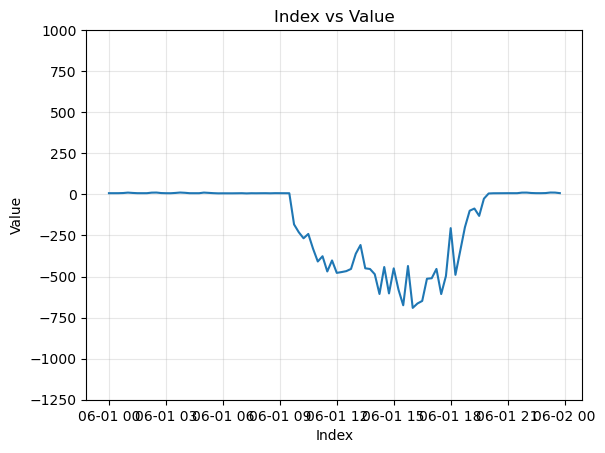

In [106]:
import matplotlib.pyplot as plt

plt.plot(df['datetime'],df['net_load'])
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Index vs Value')
plt.grid(alpha=0.3) 
plt.ylim(-1250,1000)
plt.show()

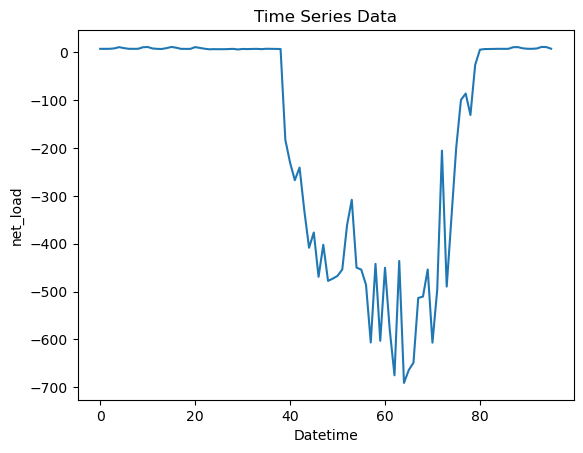

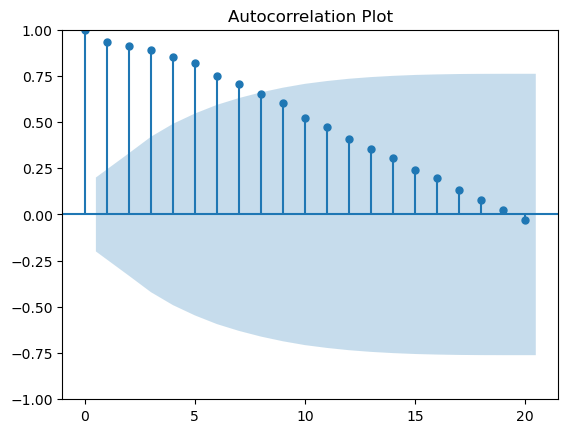

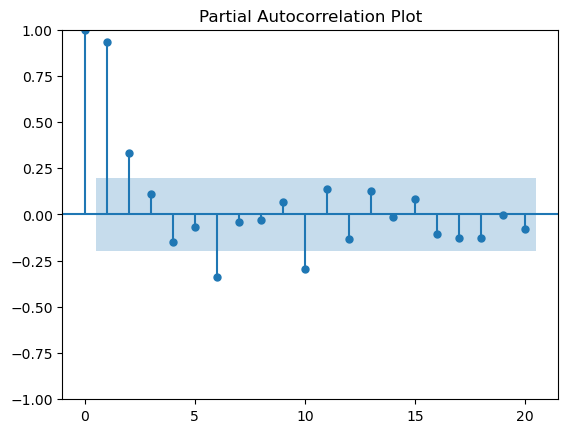

c:\Users\xlow6\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\xlow6\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:               net_load   No. Observations:                   96
Model:                 ARIMA(2, 1, 7)   Log Likelihood                -522.954
Date:                Fri, 22 Mar 2024   AIC                           1065.907
Time:                        16:54:57   BIC                           1091.446
Sample:                             0   HQIC                          1076.227
                                 - 96                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8420      0.146      5.771      0.000       0.556       1.128
ar.L2         -0.5795      0.168     -3.454      0.001      -0.908      -0.251
ma.L1         -1.2777      6.612     -0.193      0.8

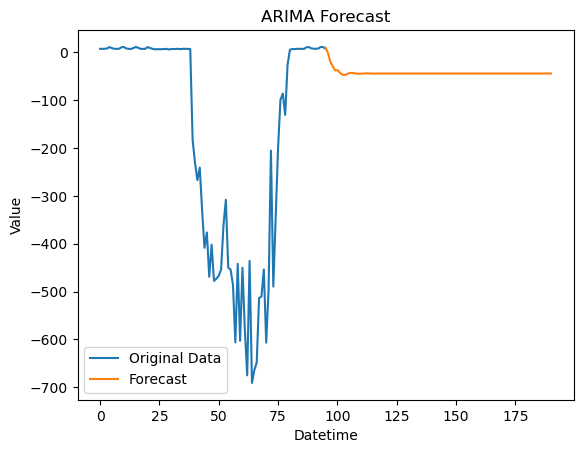

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'df' is your DataFrame with datetime index and 'value' column

# Plot the time series data
df['net_load'].plot()
plt.xlabel('Datetime')
plt.ylabel('net_load')
plt.title('Time Series Data')
plt.show()

# Plot autocorrelation and partial autocorrelation plots
plot_acf(df['net_load'])
plt.title('Autocorrelation Plot')
plt.show()

plot_pacf(df['net_load'])
plt.title('Partial Autocorrelation Plot')
plt.show()

# Fit ARIMA model
order = (2, 1, 7)  # Example: ARIMA(2,1,1) model
model = ARIMA(df['net_load'], order=order)
fitted_model = model.fit()

# Summary of the model
print(fitted_model.summary())

# Forecast future values for the next day (96 15-minute intervals)
forecast_steps = 96
forecast = fitted_model.forecast(steps=forecast_steps)

# Generate datetime index for the forecasted values
last_datetime = df.index[-1]
#forecast_index = pd.date_range(start=last_datetime, periods=forecast_steps + 1, freq='15T')[1:]  # Start from the next interval
forecast_index = list(range(95, 191))

# Plot the original data and forecasted values
plt.plot(df.index, df['net_load'], label='Original Data')
plt.plot(forecast_index, forecast, label='Forecast')
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()


In [101]:
print(last_datetime)

2879
